<a href="https://www.kaggle.com/code/mohammadtanvirul/titanic-survival-prediction-using-ml-pipeline?scriptVersionId=149825552" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

Here goes Titanic Survival Prediction using  ML Pipeline

1) Introduction

* Import Libraries
* Load data
* Run Statistical summeries
* Figure out missing value columns

2) Visualizations

* Correlation with target variable

3) Missing values imputation

* train data Missing columns- Embarked,Age,Cabin
* test data Missing columns- Age and Fare

4) Feature Engineering

* Calculate total family size
* Get title from name
* Find out which deck passenger belonged to
* Dealing with Categorical Variables
* Label encoding
* Feature Scaling

5) Prediction

* Split into training & test sets
* Build the model
* Feature importance
* Predictions
* Ensemble : Majority voting


# Import libraries

In [1]:
# We can use the pandas library in python to read in the csv file.
import pandas as pd
#for numerical computaions we can use numpy library
import numpy as np

# Load train & test data

In [2]:
# This creates a pandas dataframe and assigns it to the titanic variable.
titanic = pd.read_csv("/kaggle/input/titanicdataset/Titanic/train .csv")

# Print the first 5 rows of the dataframe.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [4]:
titanic_test = pd.read_csv("/kaggle/input/titanicdataset/Titanic/test.csv")
#transpose
titanic_test.head().T
#note their is no Survived column here which is our target varible we are trying to predict

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47.0,62.0,27.0,22.0
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7.0,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [5]:
#shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
#(rows,columns)
titanic.shape

(891, 12)

In [6]:
titanic_test.shape

(418, 11)

In [7]:
#Describe gives statistical information about numerical columns in the dataset
titanic.describe()
#you can check from count if there are missing vales in columns, here age has got missing values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
#lets see if there are any more columns with missing values 
null_columns=titanic.columns[titanic.isnull().any()]
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
null_columns=titanic_test.columns[titanic_test.isnull().any()]
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Age,Cabin and Embarked has missing values. we will see how to fill missing values next**

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


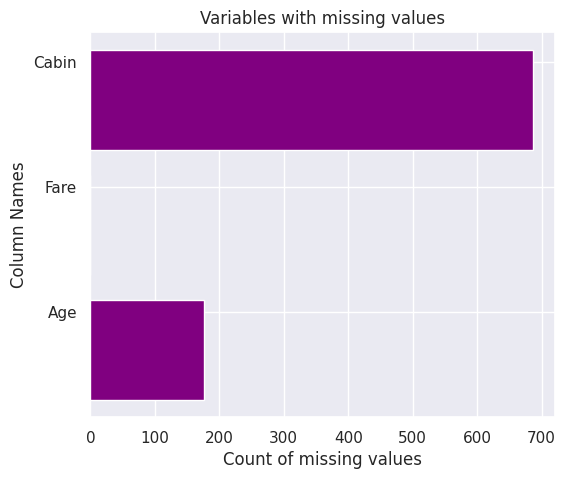

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

#pd.options.display.mpl_style = 'default'
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(titanic[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

**Age, Fare and cabin has missing values. we will see how to fill missing values next.**

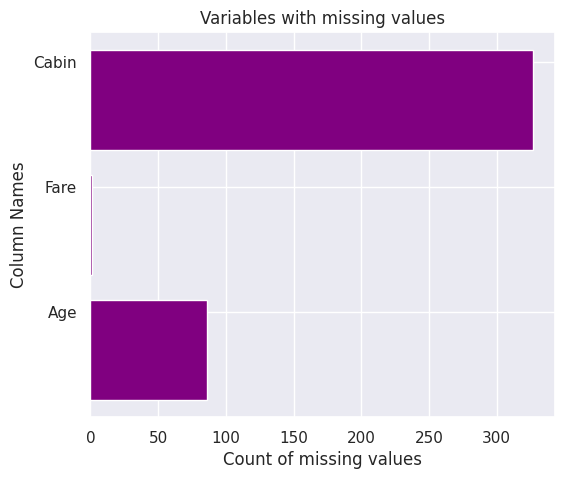

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

# pd.options.display.mpl_style = 'default'
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(titanic_test[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

# Visualizations

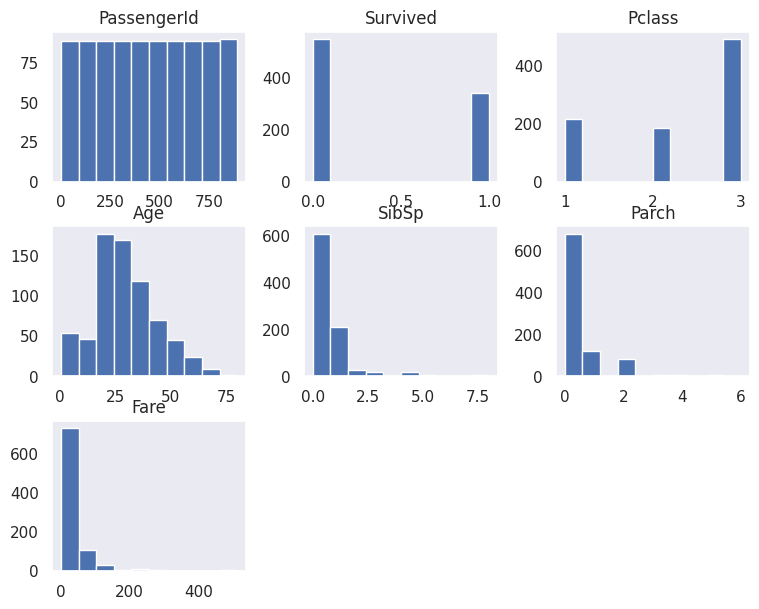

In [15]:
titanic.hist(bins=10,figsize=(9,7),grid=False);

**we can see that Age and Fare are measured on very different scaling. So we need to do feature scaling before predictions.**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


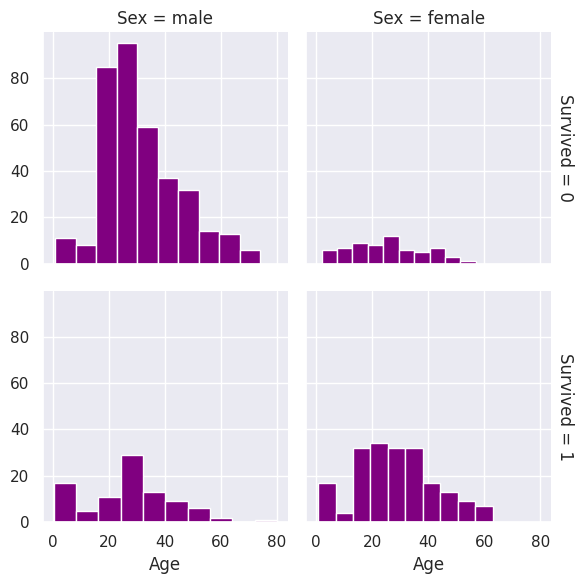

In [16]:
g = sns.FacetGrid(titanic, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


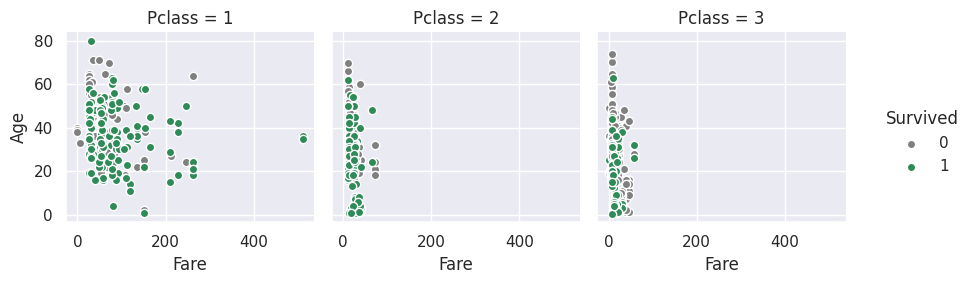

In [17]:
g = sns.FacetGrid(titanic, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


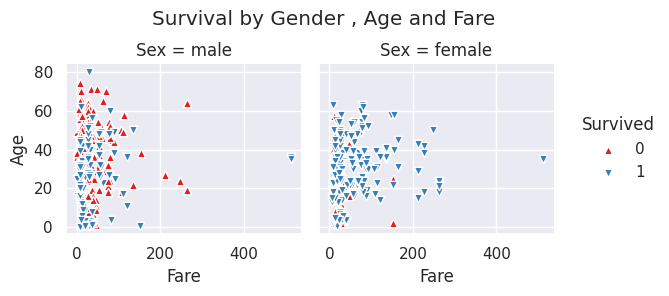

In [18]:
g = sns.FacetGrid(titanic, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

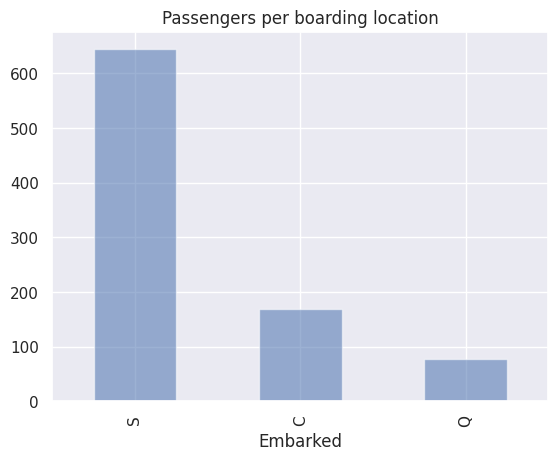

In [19]:
titanic.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers per boarding location");

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


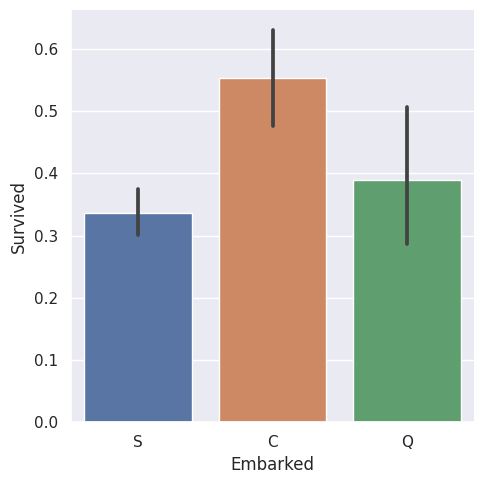

In [20]:
sns.catplot(x='Embarked', y="Survived", data= titanic, 
                kind='bar')


/tmp/ipykernel_26/3928818386.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="Sex", y="Survived", col="Pclass",
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


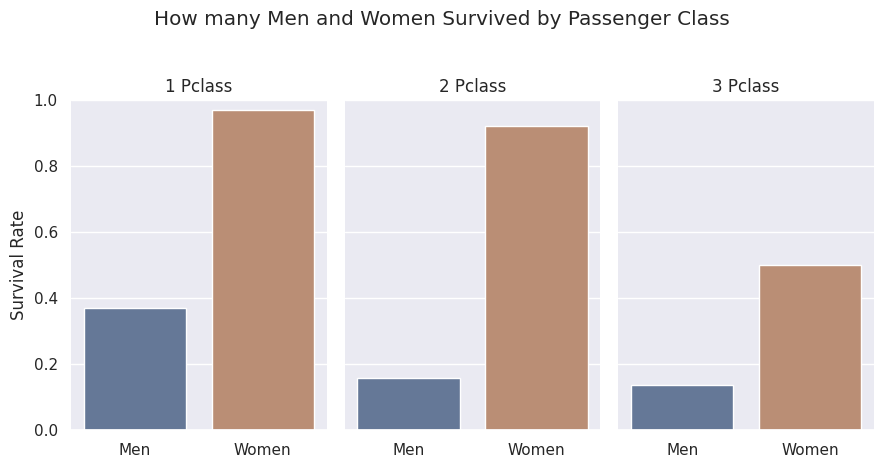

In [21]:
sns.set(font_scale=1)
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

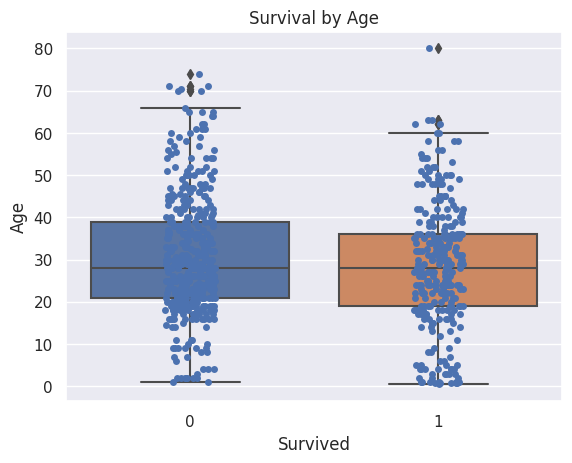

In [23]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=titanic)
ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic, jitter=True,
                   edgecolor="gray")
plt.title("Survival by Age",fontsize=12);

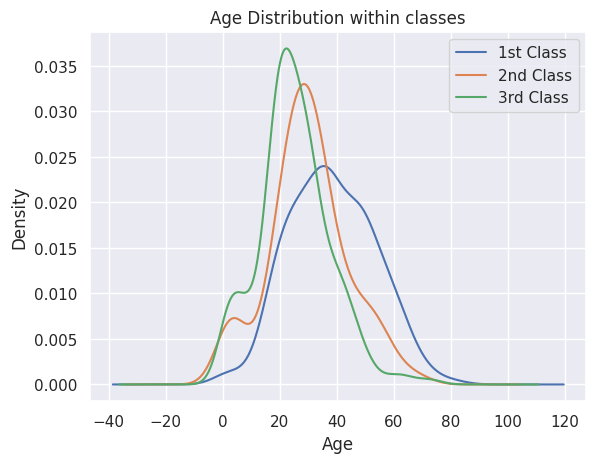

In [24]:
titanic.Age[titanic.Pclass == 1].plot(kind='kde')    
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

In [25]:

# # Identify non-numeric columns that you want to convert
# non_numeric_columns = titanic.select_dtypes(exclude=['int', 'float']).columns

# # Perform one-hot encoding for non-numeric columns
# titanic = pd.get_dummies(titanic, columns=non_numeric_columns)

# # Now, you should have a DataFrame with only numeric values, and you can calculate the correlation matrix

# corr=titanic.corr()                   #["Survived"]
# plt.figure(figsize=(10, 10))

# # sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="white")

# sns.heatmap(data=corr, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu', linecolor="white")

# plt.title('Correlation between features');

In [26]:
# corr=titanic.corr()                   #["Survived"]
# plt.figure(figsize=(10, 10))

# sns.heatmap(corr, vmax=.8, linewidths=0.01,
#             square=True,annot=True,cmap='YlGnBu',linecolor="white")
# plt.title('Correlation between features');

In [27]:
# #correlation of features with target variable
# titanic.corr()["Survived"]

**Looks like Pclass has got highest negative correlation with "Survived" followed by Fare, Parch and Age**

In [28]:
# g = sns.factorplot(x="Age", y="Embarked",
#                     hue="Sex", row="Pclass",
#                     data=titanic[titanic.Embarked.notnull()],
#                     orient="h", size=2, aspect=3.5, 
#                    palette={'male':"purple", 'female':"blue"},
#                     kind="violin", split=True, cut=0, bw=.2);



/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


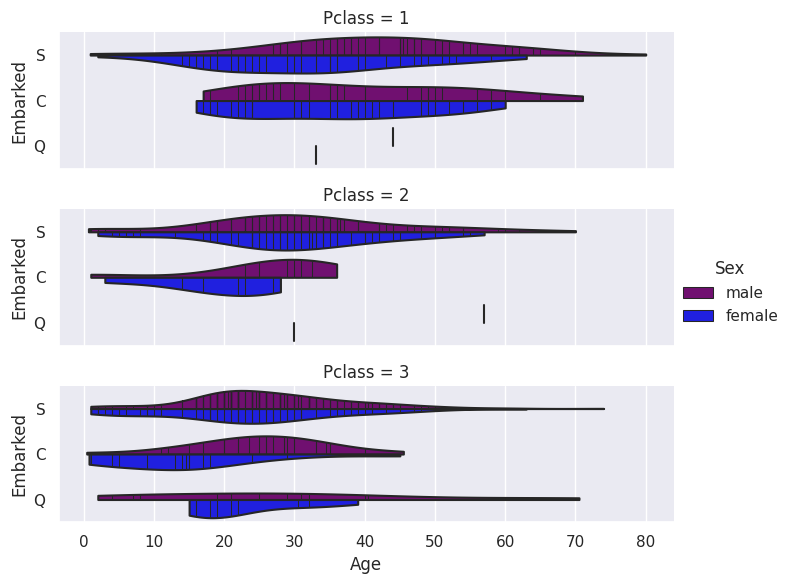

In [29]:

g = sns.catplot(x="Age", y="Embarked", hue="Sex", row="Pclass",
                data=titanic[titanic.Embarked.notnull()],
                orient="h", height=2, aspect=3.5,
                palette={'male': "purple", 'female': "blue"},
                kind="violin", split=True, cut=0, inner="stick")


# Missing Value Imputation

**Its important to fill missing values, because some machine learning algorithms can't accept them eg SVM.**

But filling missing values with mean/median/mode is also a prediction which may not be 100% accurate, instead you can use models like Decision Trees and Random Forest which handle missing values very well.

**Embarked Column**

In [30]:
#Lets check which rows have null Embarked column
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**PassengerId 62 and 830 have missing embarked values**

**Both have Passenger class 1 and fare $80**

**Lets plot a graph to visualize and try to guess from where they embarked**

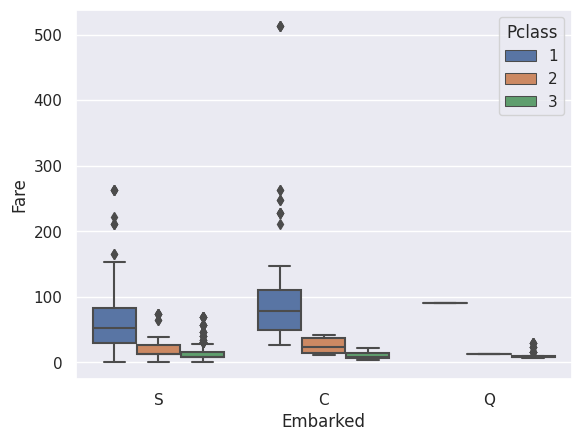

In [31]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanic);

In [32]:
#The fillna method is a common operation in data analysis and manipulation, and it allows you to replace missing values in a DataFrame or Series with a specified value.

titanic["Embarked"] = titanic["Embarked"].fillna('C')

**We can see that for 1st class median line is coming around fare $80 for embarked value 'C'. So we can replace NA values in Embarked column with 'C'**

In [33]:
#there is an empty fare column in test set
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Fare Column**

In [34]:
titanic_test[titanic_test['Fare'].isnull()]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [35]:
#we can replace missing value in fare by taking median of all fares of those passengers 
#who share 3rd Passenger class and Embarked from 'S' 
def fill_missing_fare(df):
    median_fare=df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Fare'].median()
#'S'
    #print(median_fare)
    df["Fare"] = df["Fare"].fillna(median_fare)
    return df

titanic_test=fill_missing_fare(titanic_test)

# Feature Engineering

**Deck- Where exactly were passenger on the ship?**

In [36]:
titanic["Deck"]=titanic.Cabin.str[0]
titanic_test["Deck"]=titanic_test.Cabin.str[0]
titanic["Deck"].unique() # 0 is for null values

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


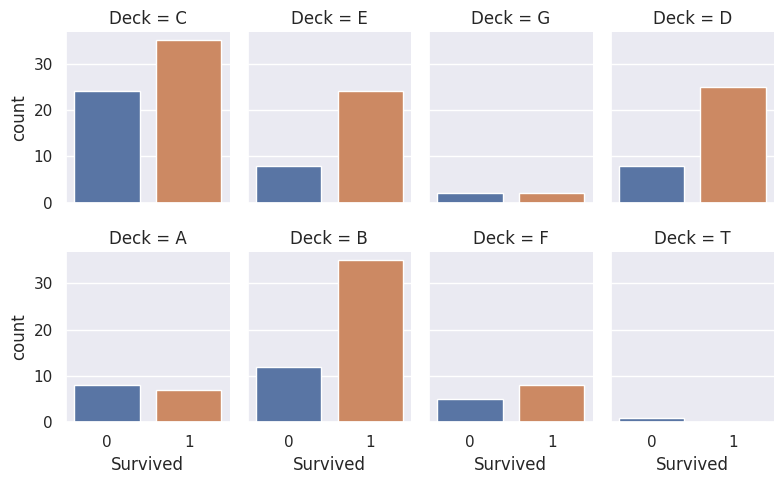

In [37]:
g = sns.catplot(x="Survived", col="Deck", col_wrap=4,
                data=titanic[titanic.Deck.notnull()],
                kind="count", height=2.5, aspect=0.8);


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


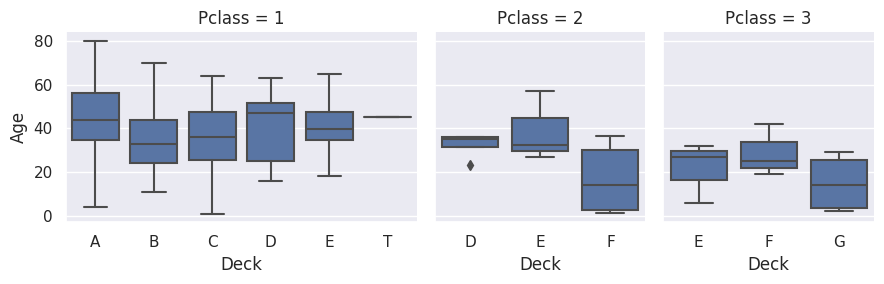

In [38]:
titanic['Deck'] = titanic['Deck'].astype(object)
titanic = titanic.sort_values(by='Deck')
g = sns.FacetGrid(titanic, col="Pclass", sharex=False, gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "Deck", "Age")

In [39]:
titanic.Deck.fillna('Z', inplace=True)
titanic_test.Deck.fillna('Z', inplace=True)
titanic["Deck"].unique() # Z is for null values

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Z'], dtype=object)

**How Big is your family?**

In [40]:
# Create a family size variable including the passenger themselves
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]+1
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]+1

print(titanic["FamilySize"].value_counts())

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64


In [41]:
# Discretize family size
titanic.loc[titanic["FamilySize"] == 1, "FsizeD"] = 'singleton'
titanic.loc[(titanic["FamilySize"] > 1)  &  (titanic["FamilySize"] < 5) , "FsizeD"] = 'small'
titanic.loc[titanic["FamilySize"] >4, "FsizeD"] = 'large'

titanic_test.loc[titanic_test["FamilySize"] == 1, "FsizeD"] = 'singleton'
titanic_test.loc[(titanic_test["FamilySize"] >1) & (titanic_test["FamilySize"] <5) , "FsizeD"] = 'small'
titanic_test.loc[titanic_test["FamilySize"] >4, "FsizeD"] = 'large'


print(titanic["FsizeD"].unique())
print(titanic["FsizeD"].value_counts())

['singleton' 'small' 'large']
FsizeD
singleton    537
small        292
large         62
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


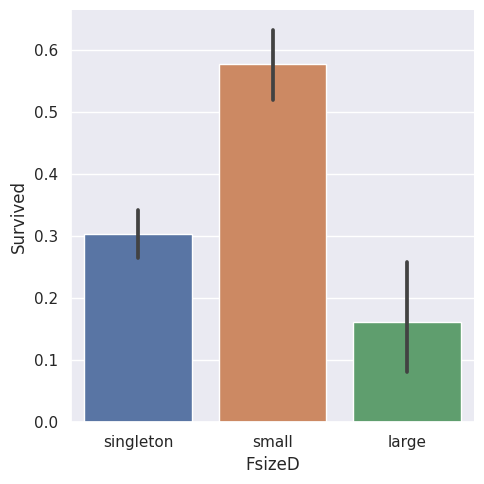

In [42]:
# sns.factorplot(x="FsizeD", y="Survived", data=titanic);

sns.catplot(x="FsizeD", y="Survived", data=titanic, kind="bar")
plt.show()

**Do you have longer names?**

In [43]:
#Create feture for length of name 
# The .apply method generates a new series
titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))

titanic_test["NameLength"] = titanic_test["Name"].apply(lambda x: len(x))
print(titanic["NameLength"].value_counts())




NameLength
19    64
25    55
27    50
18    50
26    49
28    43
24    43
17    42
21    40
23    39
20    39
22    38
30    37
29    32
31    30
16    26
32    23
33    22
15    15
47    11
37    10
39     9
38     9
45     9
36     9
41     8
44     8
51     7
46     7
34     7
40     7
35     6
43     5
49     5
42     5
50     4
52     4
56     3
48     3
14     3
13     2
53     2
57     2
55     2
12     2
82     1
54     1
65     1
67     1
61     1
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


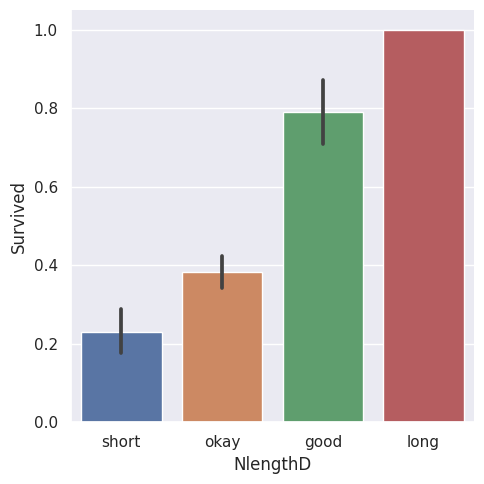

['okay', 'short', 'good', 'long']
Categories (4, object): ['short' < 'okay' < 'good' < 'long']


In [44]:
bins = [0, 20, 40, 57, 85]
group_names = ['short', 'okay', 'good', 'long']
titanic['NlengthD'] = pd.cut(titanic['NameLength'], bins, labels=group_names)
titanic_test['NlengthD'] = pd.cut(titanic_test['NameLength'], bins, labels=group_names)

# sns.factorplot(x="NlengthD", y="Survived", data=titanic)


sns.catplot(x="NlengthD", y="Survived", data=titanic, kind="bar")
plt.show()

print(titanic["NlengthD"].unique())

**Whats in the name?**

In [45]:
import re

#A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    #If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

#Get all the titles and print how often each one occurs.
titles = titanic["Name"].apply(get_title)
print(pd.value_counts(titles))

Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Sir           1
Mme           1
Countess      1
Capt          1
Don           1
Ms            1
Jonkheer      1
Name: count, dtype: int64


In [46]:
#Add in the title column.
titanic["Title"] = titles

# Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Also reassign mlle, ms, and mme accordingly
titanic.loc[titanic["Title"] == "Mlle", "Title"] = 'Miss'
titanic.loc[titanic["Title"] == "Ms", "Title"] = 'Miss'
titanic.loc[titanic["Title"] == "Mme", "Title"] = 'Mrs'
titanic.loc[titanic["Title"] == "Dona", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Lady", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Countess", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Capt", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Col", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Don", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Major", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Rev", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Sir", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Jonkheer", "Title"] = 'Rare Title'
titanic.loc[titanic["Title"] == "Dr", "Title"] = 'Rare Title'



# titanic.loc[titanic["Title"].isin(['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
#                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']), "Title"] = 'Rare Title'

# titanic[titanic['Title'].isin(['Dona', 'Lady', 'Countess'])]
# titanic.query("Title in ('Dona', 'Lady', 'Countess')")


titanic["Title"].value_counts()

Title
Mr            517
Miss          185
Mrs           126
Master         40
Rare Title     23
Name: count, dtype: int64

In [47]:
titles = titanic_test["Name"].apply(get_title)
print(pd.value_counts(titles))

Name
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [48]:
#Add in the title column.
titanic_test["Title"] = titles

# Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Also reassign mlle, ms, and mme accordingly
titanic_test.loc[titanic_test["Title"] == "Mlle", "Title"] = 'Miss'
titanic_test.loc[titanic_test["Title"] == "Ms", "Title"] = 'Miss'
titanic_test.loc[titanic_test["Title"] == "Mme", "Title"] = 'Mrs'
titanic_test.loc[titanic_test["Title"] == "Dona", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Lady", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Countess", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Capt", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Col", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Don", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Major", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Rev", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Sir", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Jonkheer", "Title"] = 'Rare Title'
titanic_test.loc[titanic_test["Title"] == "Dr", "Title"] = 'Rare Title'

titanic_test["Title"].value_counts()

Title
Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      6
Name: count, dtype: int64

**Ticket column**

In [49]:
titanic["Ticket"].tail()


884    SOTON/OQ 392076
885             382652
886             211536
888         W./C. 6607
890             370376
Name: Ticket, dtype: object

In [50]:
titanic["TicketNumber"] = titanic["Ticket"].str.extract('(\d{2,})', expand=True)
titanic["TicketNumber"] = titanic["TicketNumber"].apply(pd.to_numeric)


titanic_test["TicketNumber"] = titanic_test["Ticket"].str.extract('(\d{2,})', expand=True)
titanic_test["TicketNumber"] = titanic_test["TicketNumber"].apply(pd.to_numeric)

In [51]:
#some rows in ticket column dont have numeric value so we got NaN there
titanic[titanic["TicketNumber"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5,E77,S,E,1,singleton,17,short,Mrs,NaN
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,19,short,Mr,NaN
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,28,okay,Mr,NaN
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,31,okay,Mr,NaN
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,19,short,Mr,NaN
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5,NaN,S,Z,1,singleton,24,okay,Mr,NaN


In [52]:
titanic.TicketNumber.fillna(titanic["TicketNumber"].median(), inplace=True)
titanic_test.TicketNumber.fillna(titanic_test["TicketNumber"].median(), inplace=True)

# Convert Categorical variables into Numerical ones

In [53]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Embarked','Sex',"Title","FsizeD","NlengthD",'Deck']
for col in cat_vars:
    titanic[col]=labelEnc.fit_transform(titanic[col])
    titanic_test[col]=labelEnc.fit_transform(titanic_test[col])

titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber
475,476,0,1,"Clifford, Mr. George Quincy",1,NaN,0,0,110465,52.0000,A14,2,0,1,1,27,2,2,110465.0
174,175,0,1,"Smith, Mr. James Clinch",1,56.0,0,0,17764,30.6958,A7,0,0,1,1,23,2,2,17764.0
209,210,1,1,"Blank, Mr. Henry",1,40.0,0,0,112277,31.0000,A31,0,0,1,1,16,3,2,112277.0
445,446,1,1,"Dodge, Master. Washington",1,4.0,0,2,33638,81.8583,A34,2,0,3,2,25,2,0,33638.0
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",1,56.0,0,0,13213,35.5000,A26,0,0,1,1,35,2,4,13213.0


**Age Column**

Age seems to be promising feature. So it doesnt make sense to simply fill null values out with median/mean/mode.

We will use **Random Forest** algorithm to predict ages.

/tmp/ipykernel_26/683941396.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic["Age"].dropna(),


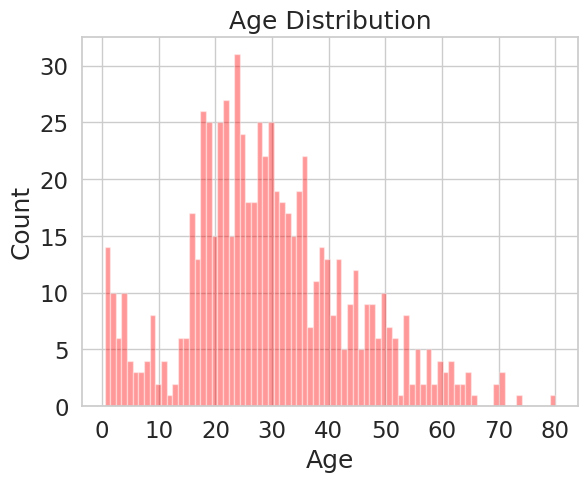

In [54]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(titanic["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="red")
    plt.title("Age Distribution")
    plt.ylabel("Count");

In [55]:
 from sklearn.ensemble import RandomForestRegressor
#predicting missing values in age using Random Forest
def fill_missing_age(df):
    
    #Feature set
    age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp',
                 'TicketNumber', 'Title','Pclass','FamilySize',
                 'FsizeD','NameLength',"NlengthD",'Deck']]
    # Split sets into train and test
    train  = age_df.loc[ (df.Age.notnull()) ]# known Age values
    test = age_df.loc[ (df.Age.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

In [56]:
titanic=fill_missing_age(titanic)
titanic_test=fill_missing_age(titanic_test)

/tmp/ipykernel_26/2667991957.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic["Age"].dropna(),


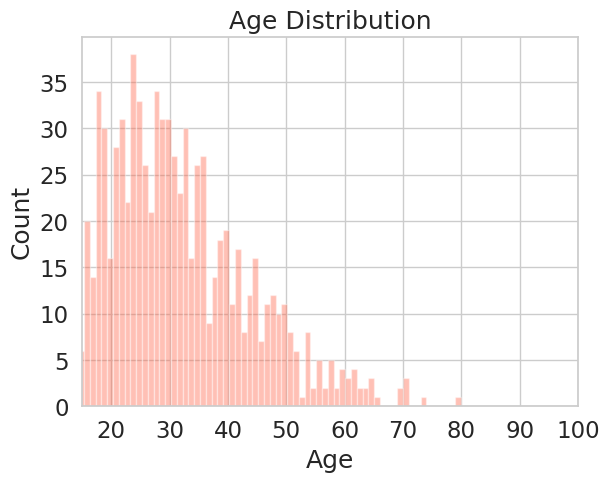

In [57]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(titanic["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100));

# Feature Scaling



**We can see that Age, Fare are measured on different scales, so we need to do Feature Scaling first before we proceed with predictions.**

In [58]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(titanic[['Age', 'Fare']])
titanic[['Age', 'Fare']] = std_scale.transform(titanic[['Age', 'Fare']])


std_scale = preprocessing.StandardScaler().fit(titanic_test[['Age', 'Fare']])
titanic_test[['Age', 'Fare']] = std_scale.transform(titanic_test[['Age', 'Fare']])

# Correlation of features with target

In [59]:
# titanic.corr()["Survived"]


# Predict Survival

**Linear Regression**

In [60]:
!pip install scikit-learn


In [61]:
# Import the linear regression class
from sklearn.linear_model import LinearRegression

# Sklearn also has a helper that makes it easy to do cross validation
from sklearn.model_selection import KFold


# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age","SibSp", "Parch", "Fare",
              "Embarked","NlengthD", "FsizeD", "Title","Deck"]
target="Survived"

# Initialize our algorithm class
alg = LinearRegression()

# Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
# We set random_state to ensure we get the same splits every time we run this.
kf = KFold( n_splits = 5 )

predictions = []




In [62]:
 for train_index, test_index in kf.split(titanic):
        # The predictors we're using to train the algorithm.  Note how we only take the rows in the train folds.
        train_predictors = titanic[predictors].iloc[train_index, :]

        # The target we're using to train the algorithm.
        train_target = titanic[target].iloc[train_index]

        # Training the algorithm using the predictors and target.
        alg.fit(train_predictors, train_target)

        # We can now make predictions on the test fold
        test_predictions = alg.predict(titanic[predictors].iloc[test_index, :])
        predictions.append(test_predictions)

In [63]:
predictions = np.concatenate(predictions, axis=0)

# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0


accuracy=sum(titanic["Survived"]==predictions)/len(titanic["Survived"])
accuracy

0.8114478114478114

**Logistic Regression**

In [64]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [65]:
predictors = ["Pclass", "Sex", "Fare", "Embarked","Deck","Age",
              "FsizeD", "NlengthD","Title","Parch"]

# Initialize our algorithm
lr = LogisticRegression(random_state=1)

# Compute the accuracy score for all the cross validation folds.
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)

scores = cross_val_score(lr, titanic[predictors], 
                        titanic["Survived"],scoring='f1', cv=cv)

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.7450281206756229


# Random Forest

In [66]:
!pip install scikit-learn


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.model_selection import cross_val_score, train_test_split, KFold

from sklearn.model_selection import cross_val_score





In [68]:
import numpy as np
predictors = ["Pclass", "Sex", "Age",
              "Fare","NlengthD","NameLength", "FsizeD", "Title","Deck"]

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold


# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
rf = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, 
                            min_samples_leaf=1)


# kf = KFold(titanic.shape[0], n_folds=5, random_state=1)

kf = KFold( n_splits = 5 )
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)

#predictions = cross_validation.cross_val_predict(rf, titanic[predictors],titanic["Survived"],cv=kf)



# Assuming you have defined your rf, predictors, titanic, and kf earlier

predictions = cross_val_predict(rf, titanic[predictors], titanic["Survived"], cv=kf)


predictions = pd.Series(predictions)
scores = cross_val_score(rf, titanic[predictors], titanic["Survived"],
                                          scoring='f1', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.7624365346046891


# Important features

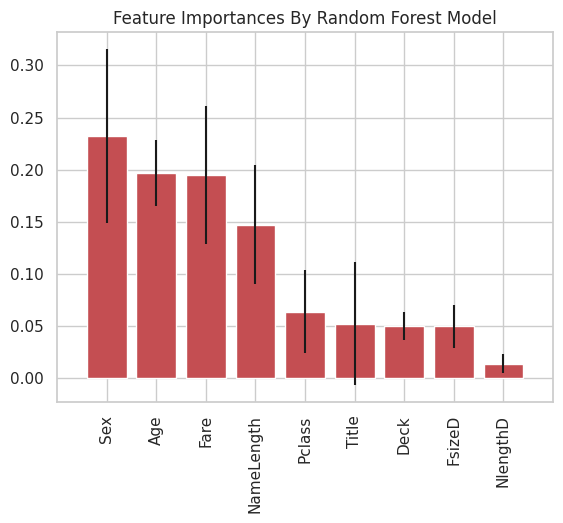

In [70]:
# importances=rf.feature_importances_
# std = np.std([rf.feature_importances_ for tree in rf.estimators_],
#              axis=0)

# Create an instance of RandomForestClassifier
# rf = RandomForestClassifier()

 # The predictors we're using to train the algorithm.  Note how we only take the rows in the train folds.
train_predictors = titanic[predictors].iloc[train_index, :]

# The target we're using to train the algorithm.
train_target = titanic[target].iloc[train_index]

# Training the algorithm using the predictors and target.
rf.fit(train_predictors, train_target)







# Fit the RandomForestClassifier with your training data
# rf.fit(titanic, titanic_test)  # Replace X_train and y_train with your actual training data

# Now you can compute feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)


indices = np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
#predictors=titanic.columns
plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)]);

# Gradient Boosting

In [71]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.model_selection import cross_val_score

%matplotlib inline
import matplotlib.pyplot as plt






In [72]:
predictors = ["Pclass", "Sex", "Age",
              "Fare","NlengthD", "FsizeD","NameLength","Deck","Embarked"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

SelectKBest(k=5)

In [73]:
# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

indices = np.argsort(scores)[::-1]

sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])



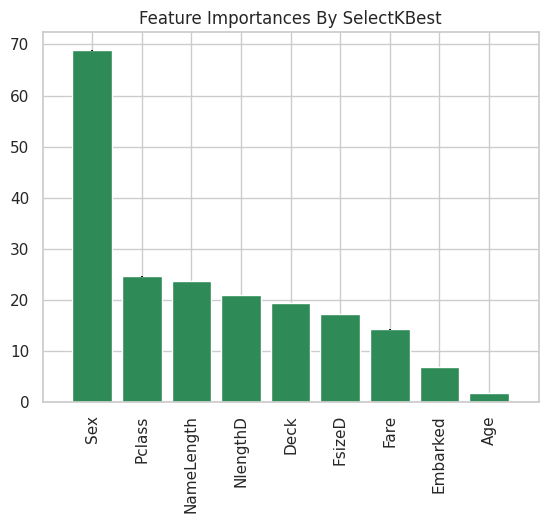

In [74]:
plt.figure()
plt.title("Feature Importances By SelectKBest")
plt.bar(range(np.size(predictors)), scores[indices],
       color="seagreen", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)]);

In [75]:

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked","NlengthD",
              "FsizeD", "Title","Deck"]

# Initialize our algorithm
lr = LogisticRegression(random_state=1)

# Compute the accuracy score for all the cross validation folds.  
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)
scores = cross_val_score(lr, titanic[predictors], titanic["Survived"], scoring='f1',cv=cv)

print(scores.mean())

0.7464486154105499


**AdaBoost**

In [76]:
from sklearn.ensemble import AdaBoostClassifier
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked","NlengthD",
              "FsizeD", "Title","Deck","TicketNumber"]

adb=AdaBoostClassifier()
adb.fit(titanic[predictors],titanic["Survived"])

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)
scores = cross_val_score(adb, titanic[predictors], titanic["Survived"], scoring='f1',cv=cv)
print(scores.mean())

0.7640195636820873


# Maximum Voting ensemble and Submission

In [77]:
predictions=["Pclass", "Sex", "Age", "Fare", "Embarked","NlengthD",
              "FsizeD", "Title","Deck","NameLength","TicketNumber"]

from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[
        ('lr', lr), ('rf', rf), ('adb', adb)], voting='soft')
eclf1 = eclf1.fit(titanic[predictors], titanic["Survived"])
predictions=eclf1.predict(titanic[predictors])
predictions



array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [78]:
test_predictions=eclf1.predict(titanic_test[predictors])

test_predictions=test_predictions.astype(int)
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": test_predictions
    })

submission.to_csv("titanic_submission.csv", index=False)